In [39]:
import pandas as pd
import seaborn as sns

In [18]:
data = pd.read_csv("../DataSets/kc_tax.csv")

data.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [19]:
data.dropna(inplace=True)

In [20]:
data.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.673630e+05,467363.000000,4.673630e+05
mean,4.676182e+05,2027.931225,9.830980e+04
std,5.337673e+05,917.683271,1.441381e+05
min,2.000000e+03,0.000000,0.000000e+00
25%,2.660000e+05,1400.000000,9.803200e+04
50%,3.800000e+05,1880.000000,9.807000e+04
75%,5.440000e+05,2480.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [21]:
cleaned_data = data.loc[(data['SqFtTotLiving']>150)&(data['SqFtTotLiving']<4000)&(data['TaxAssessedValue']<1000000)&(data['ZipCode']!=0),:]

<AxesSubplot:xlabel='SqFtTotLiving', ylabel='TaxAssessedValue'>

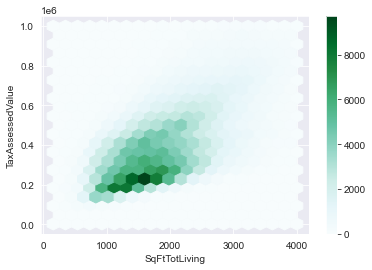

In [22]:
# hexagonal binning plot

cleaned_data.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue', gridsize=20, sharex=False)

KeyboardInterrupt: 

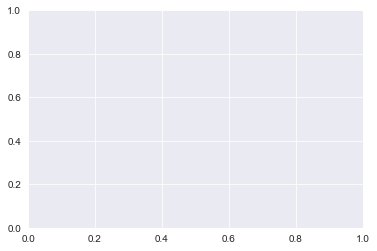

In [23]:
# Contour plot
ax = sns.kdeplot(x=cleaned_data['SqFtTotLiving'],y=cleaned_data['TaxAssessedValue'])

In [24]:
# Contingency table
categorical_data={
    "videojuego1":{
        "categoria":"videojuego",
        "estrellas":3
    },
    "videojuego2":{
        "categoria":"videojuego",
        "estrellas":4
    },
    "videojuego3":{
        "categoria":"videojuego",
        "estrellas":5
    },
    "productividad1":{
        "categoria":"prod",
        "estrellas":3
    },
    "productividad2":{
        "categoria":"prod",
        "estrellas":4
    },
    "productividad3":{
        "categoria":"prod",
        "estrellas":5
    },
    "productividad4":{
        "categoria":"prod",
        "estrellas":3
    },
    "productividad5":{
        "categoria":"prod",
        "estrellas":4
    },
    "productividad6":{
        "categoria":"prod",
        "estrellas":5
    },
}

categorical_df = pd.DataFrame(categorical_data)
categorical_df= categorical_df.transpose()

In [25]:
categorical_df

,categoria,estrellas
videojuego1,videojuego,3
videojuego2,videojuego,4
videojuego3,videojuego,5
productividad1,prod,3
productividad2,prod,4
productividad3,prod,5
productividad4,prod,3
productividad5,prod,4
productividad6,prod,5


In [26]:
categorical_df.pivot_table(index='categoria',columns='estrellas',aggfunc=lambda x:len(x))

estrellas,3,4,5
categoria,,,
prod,2,2,2
videojuego,1,1,1


In [29]:
airline_data = pd.read_csv("../DataSets/airline_stats.csv")

airline_data

airline_data.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


<AxesSubplot:title={'center':'pct_carrier_delay'}, xlabel='airline'>

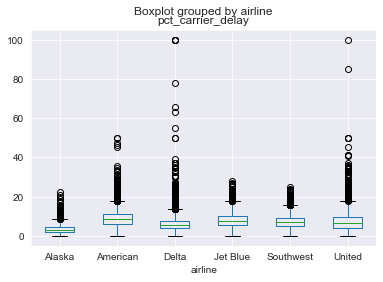

In [31]:
airline_data.boxplot(by='airline', column='pct_carrier_delay')

In [38]:
airline_data[airline_data['airline']=="Alaska"].count()

pct_carrier_delay    3851
pct_atc_delay        3851
pct_weather_delay    3851
airline              3851
dtype: int64

/Users/tzuzul/PycharmProjects/data-science-abril2022/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='pct_carrier_delay'>

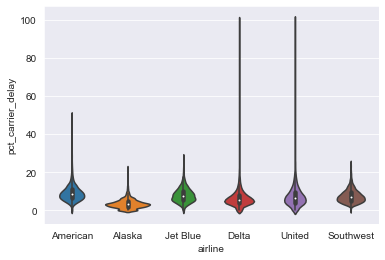

In [40]:
# Violin plot
sns.violinplot(airline_data['airline'],airline_data['pct_carrier_delay'])

In [ ]:
# Multiples variables: sns.FacetGrid()